# 2D example (Exercise 12)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("axes", titlesize=16)
plt.rc("font", size=12)
from scipy.optimize import fmin

from week_03_gennemgang import LennardJones, AtomicCluster      

In [2]:
lennard_jones_calc = LennardJones()

In [3]:
cluster0 = AtomicCluster(lennard_jones_calc,
                         pos=[[-1,0],[-1.5,1.5],[1,0]],
                         static=[True, False, True])
print(cluster0.get_positions())
print(cluster0.energy)

[[-1.   0. ]
 [-1.5  1.5]
 [ 1.   0. ]]
-0.7908193694742746


In [4]:
cluster = cluster0.copy()
print(cluster.energy)

-0.7908193694742746


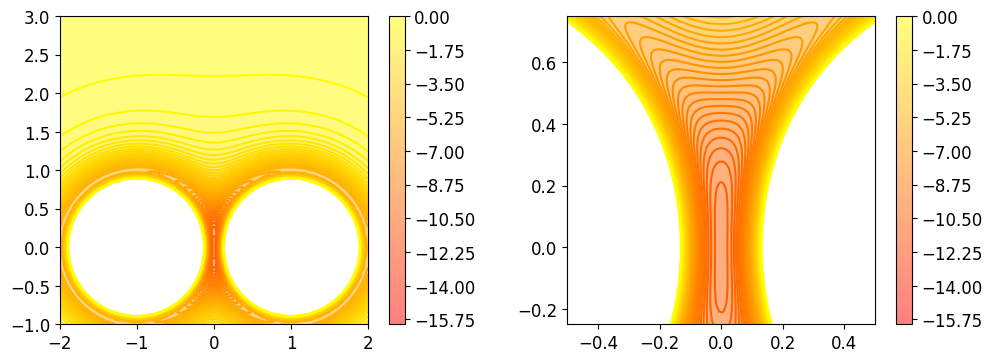

In [5]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

cluster = cluster0.copy()
atom_index = 1

xlims = ([-2, 2],[-0.5, 0.5])
ylims = ([-1, 3],[-.25, .75])
for ax,xlim,ylim in zip(axes,xlims,ylims):
    xs = np.linspace(xlim[0],xlim[1], 100)
    ys = np.linspace(ylim[0],ylim[1], 100)
    xd, yd = np.meshgrid(xs, ys)
    zd = np.zeros(xd.shape)


    for i, j in np.ndindex(xd.shape):
        cluster.pos[atom_index,0],cluster.pos[atom_index,1] = xd[i,j],yd[i,j]
        zd[i,j] = cluster.energy

    levels = np.arange(-16, 0.001, 0.25)
    cmap = 'autumn'
    ax.contour(xd, yd, zd, levels=levels, cmap=cmap)

    color_map = ax.contourf(xd, yd, zd, levels=levels, alpha=0.5, cmap=cmap)

    fig.colorbar(color_map, ax=ax)
    ax.set_aspect('equal')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [6]:
def monte_carlo_quench(cluster, N):
    pass

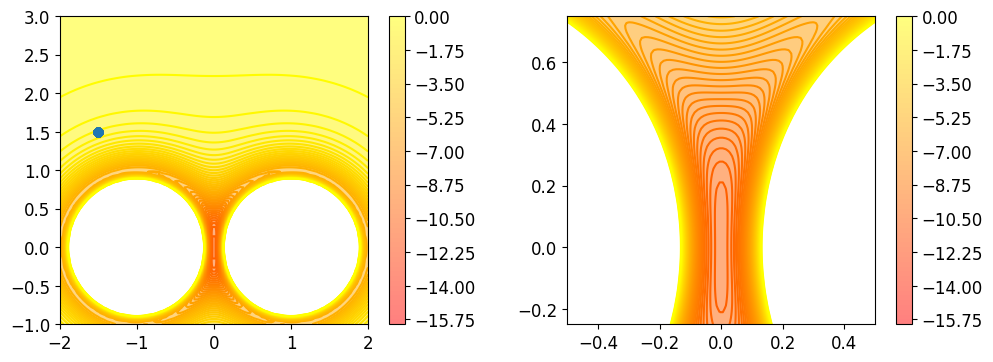

In [7]:
cluster = cluster0.copy()
index = 1
xs = []
ys = []
pos = cluster.get_positions()
xs.append(pos[index,0])
ys.append(pos[index,1])

for _ in range(100):
    monte_carlo_quench(cluster,100)
    pos = cluster.get_positions()
    xs.append(pos[index,0])
    ys.append(pos[index,1])
    
for ax in axes:
    ax.plot(xs,ys,'-o')
fig

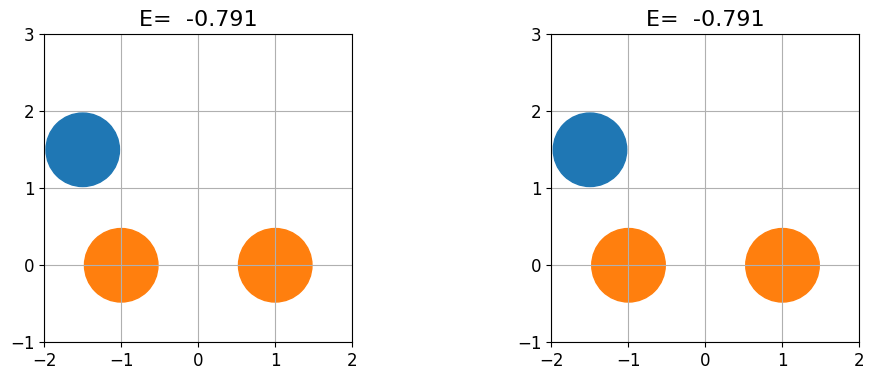

In [8]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
cluster = cluster0.copy()

cluster.draw(axes[0],2800)
monte_carlo_quench(cluster,10000)
cluster.draw(axes[1],2800)

for ax in axes:
    ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
    ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
    ax.set_aspect('equal')
    lims = [-5,5]
    ax.set_xlim([-2,2])
    ax.set_ylim([-1,3])
    ax.grid('on')
